In [163]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

In [ ]:
API_key='your_api_key'

url='http://api.openweathermap.org/data/2.5/air_pollution/history'

In [165]:
cities={
    'Delhi':(28.6139,77.2090),
    'Mumbai':(18.9582,72.8321),
    'Bangalore':(12.9629,77.5775),
    'Kolkata':(22.5744,88.3629),
    'Beijing':(39.9042,116.4074)
}

In [166]:
end_time = int(time.time())                 # now
start_time = end_time - (7 * 24 * 60 * 60)  # 7 days ago

In [167]:
rows = []

for city, (lat, lon) in cities.items():
    params = {
        "lat": lat,
        "lon": lon,
        "start": start_time,
        "end": end_time,
        "appid": API_key
    }

    response = requests.get(url, params=params)

    if response.status_code != 200:
        print(f"Failed for {city}")
        continue

    data = response.json()

    
    for item in data["list"]:
        row = {
            "city": city,
            "lat": lat,
            "lon": lon,
            "datetime": datetime.fromtimestamp(item["dt"]),
            "aqi": item["main"]["aqi"],
            "pm2_5": item["components"]["pm2_5"],
            "pm10": item["components"]["pm10"],
            "no2": item["components"]["no2"],
            "so2": item["components"]["so2"],
            "o3": item["components"]["o3"],
            "co": item["components"]["co"]
        }

        rows.append(row)


In [168]:
df=pd.DataFrame(rows)
df = df.sort_values(["city", "datetime"]).reset_index(drop=True)
df

,city,lat,lon,datetime,aqi,pm2_5,pm10,no2,so2,o3,co
0,Bangalore,12.9629,77.5775,2025-12-20 10:30:00,5,81.00,91.53,6.58,7.21,90.49,454.71
1,Bangalore,12.9629,77.5775,2025-12-20 11:30:00,5,91.72,102.01,4.58,7.22,115.57,437.56
2,Bangalore,12.9629,77.5775,2025-12-20 12:30:00,5,93.90,102.51,2.85,6.28,135.64,384.33
3,Bangalore,12.9629,77.5775,2025-12-20 13:30:00,5,89.02,96.40,2.51,5.50,139.17,355.04
4,Bangalore,12.9629,77.5775,2025-12-20 14:30:00,5,85.62,92.43,2.70,5.14,138.69,341.33
...,...,...,...,...,...,...,...,...,...,...,...
835,Mumbai,18.9582,72.8321,2025-12-27 05:30:00,5,175.85,191.62,1.98,26.52,169.60,624.26
836,Mumbai,18.9582,72.8321,2025-12-27 06:30:00,5,173.91,189.68,2.12,28.19,162.96,631.13
837,Mumbai,18.9582,72.8321,2025-12-27 07:30:00,5,170.93,186.57,2.28,29.86,154.76,635.20
838,Mumbai,18.9582,72.8321,2025-12-27 08:30:00,5,166.95,182.52,2.82,31.34,146.64,635.03


In [169]:
df.shape

(840, 11)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   city      840 non-null    object        
 1   lat       840 non-null    float64       
 2   lon       840 non-null    float64       
 3   datetime  840 non-null    datetime64[ns]
 4   aqi       840 non-null    int64         
 5   pm2_5     840 non-null    float64       
 6   pm10      840 non-null    float64       
 7   no2       840 non-null    float64       
 8   so2       840 non-null    float64       
 9   o3        840 non-null    float64       
 10  co        840 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 72.3+ KB


In [171]:
df.describe()

,lat,lon,datetime,aqi,pm2_5,pm10,no2,so2,o3,co
count,840.000000,840.00000,840,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,24.602720,86.47778,2025-12-23 22:00:00.000000256,4.563095,147.217048,169.596893,21.948071,22.187119,87.420226,890.331000
min,12.962900,72.83210,2025-12-20 10:30:00,2.000000,22.960000,27.590000,0.680000,1.160000,0.000000,229.680000
25%,18.958200,77.20900,2025-12-22 04:15:00,4.000000,70.660000,88.050000,4.897500,4.297500,37.115000,416.402500
50%,22.574400,77.57750,2025-12-23 22:00:00,5.000000,116.555000,134.175000,10.385000,11.550000,84.785000,701.715000
75%,28.613900,88.36290,2025-12-25 15:45:00,5.000000,207.702500,237.170000,21.665000,29.860000,136.782500,1100.735000
max,39.904200,116.40740,2025-12-27 09:30:00,5.000000,480.980000,547.430000,139.100000,277.210000,225.870000,5236.830000
std,9.188989,15.82502,NaN,0.748981,99.566059,108.043101,27.609698,27.209572,59.020677,732.446824


In [172]:
df["city"].value_counts()

city
Bangalore    168
Beijing      168
Delhi        168
Kolkata      168
Mumbai       168
Name: count, dtype: int64

In [173]:
df.head()

,city,lat,lon,datetime,aqi,pm2_5,pm10,no2,so2,o3,co
0,Bangalore,12.9629,77.5775,2025-12-20 10:30:00,5,81.00,91.53,6.58,7.21,90.49,454.71
1,Bangalore,12.9629,77.5775,2025-12-20 11:30:00,5,91.72,102.01,4.58,7.22,115.57,437.56
2,Bangalore,12.9629,77.5775,2025-12-20 12:30:00,5,93.90,102.51,2.85,6.28,135.64,384.33
3,Bangalore,12.9629,77.5775,2025-12-20 13:30:00,5,89.02,96.40,2.51,5.50,139.17,355.04
4,Bangalore,12.9629,77.5775,2025-12-20 14:30:00,5,85.62,92.43,2.70,5.14,138.69,341.33


In [174]:
df.groupby('city')['aqi'].mean()

city
Bangalore    3.785714
Beijing      4.636905
Delhi        4.601190
Kolkata      5.000000
Mumbai       4.791667
Name: aqi, dtype: float64

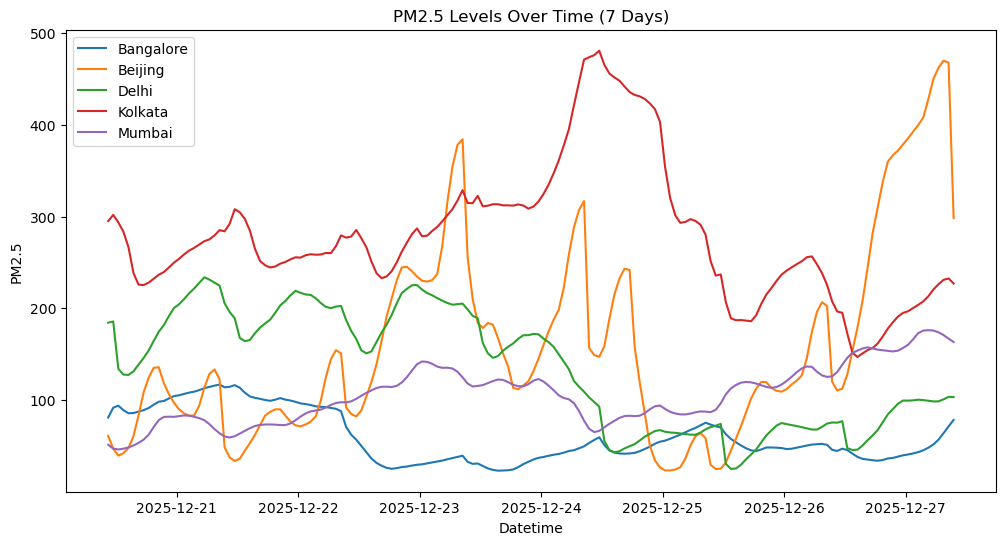

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for city in df["city"].unique():
    city_df = df[df["city"] == city]
    plt.plot(city_df["datetime"], city_df["pm2_5"], label=city)

plt.legend()
plt.title("PM2.5 Levels Over Time (7 Days)")
plt.xlabel("Datetime")
plt.ylabel("PM2.5")
plt.show()

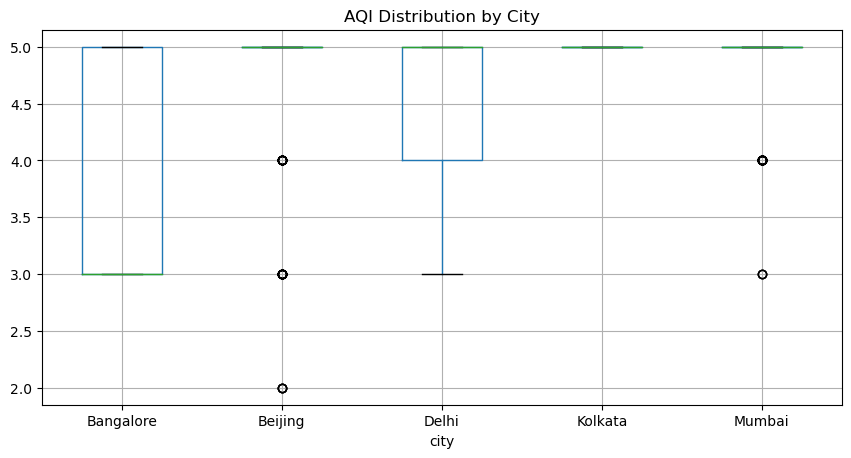

In [176]:
df.boxplot(column="aqi", by="city", figsize=(10,5))
plt.title("AQI Distribution by City")
plt.suptitle("")
plt.show()

In [177]:
df["date"] = df["datetime"].dt.date

daily_df = (
    df.groupby(["city", "date"])
      .agg({
          "pm2_5": "mean",
          "pm10": "mean",
          "aqi": "mean",
          "no2": "mean",
          "so2": "mean",
          "o3": "mean",
          "co": "mean"
      })
      .reset_index()
)

In [178]:
daily_df["pm2_5_3day_avg"] = (
    daily_df.groupby("city")["pm2_5"]
            .rolling(3)
            .mean()
            .reset_index(level=0, drop=True)
)

In [179]:
daily_df

,city,date,pm2_5,pm10,aqi,no2,so2,o3,co,pm2_5_3day_avg
0,Bangalore,2025-12-20,92.373571,101.042857,5.000000,6.232857,5.888571,117.049286,392.145714,NaN
1,Bangalore,2025-12-21,107.259583,117.173750,5.000000,6.841250,6.142500,97.967500,413.791250,NaN
2,Bangalore,2025-12-22,58.474167,66.808333,3.916667,7.747083,4.506667,83.569583,341.247500,86.035774
3,Bangalore,2025-12-23,30.699583,39.842083,3.000000,9.995000,4.182917,74.754167,327.692083,65.477778
4,Bangalore,2025-12-24,46.295000,57.132083,3.250000,11.886667,5.072083,75.946250,404.047500,45.156250
5,Bangalore,2025-12-25,58.371250,68.794583,3.708333,12.353333,4.603333,76.259583,465.809167,45.121944
6,Bangalore,2025-12-26,43.157917,50.894583,3.208333,8.239167,4.102083,76.228333,396.193333,49.274722
7,Bangalore,2025-12-27,54.089000,62.479000,3.600000,7.240000,5.316000,64.549000,381.118000,51.872722
8,Beijing,2025-12-20,86.208571,115.618571,4.285714,59.600714,46.335714,18.381429,1111.580000,NaN
9,Beijing,2025-12-21,79.359167,103.527917,4.416667,51.233333,41.079583,17.870000,1013.268750,NaN


In [180]:
import os

output_path = "air_pollution_5_cities_7_days.csv"

if os.path.exists(output_path):
    old_df = pd.read_csv(output_path, parse_dates=["datetime"])
    final_df = pd.concat([old_df, df], ignore_index=True)
else:
    final_df = df.copy()

In [181]:
final_df = final_df.drop_duplicates(subset=["city", "datetime"])
final_df.to_csv(output_path, index=False)